In [38]:
import matplotlib.pyplot as plt
import pandas  as pd
import scipy as sp
import seaborn as sns


df = pd.read_csv("df_main.csv", low_memory=False)
df

,Address,year,regionType,Cost_S01,Cost_S02,Cost_S03,Cost_S04,Cost_S05,Cost_S06,Cost_S07,...,status_s_5,status_s_6,agriculture_1,agriculture_2,days_s,income_s_y,member_incomeO,income_o_y,member_incomeSu,income_Su_y
0,10001000108,1398,U,13424000.0,630000.0,2250000.0,9012000.0,2577000.0,0.0,420000.0,...,0.0,0.0,0.0,0.0,0,0.000000e+00,1.0,392000000.0,1.0,27300000.0
1,10001000111,1398,U,18007000.0,0.0,660000.0,21231000.0,4245000.0,0.0,1600000.0,...,0.0,0.0,0.0,0.0,0,0.000000e+00,0.0,0.0,1.0,16380000.0
2,10001000113,1399,U,22929000.0,0.0,7400000.0,17006000.0,6467000.0,20850000.0,4100000.0,...,0.0,0.0,0.0,0.0,0,0.000000e+00,1.0,648000000.0,2.0,19390000.0
3,10001000114,1398,U,5778000.0,0.0,0.0,8264000.0,1975000.0,0.0,280000.0,...,0.0,0.0,0.0,0.0,0,0.000000e+00,1.0,144000000.0,1.0,5460000.0
4,10001000116,1399,U,34169000.0,0.0,5550000.0,16088000.0,9315000.0,1500000.0,4000000.0,...,0.0,0.0,0.0,0.0,0,0.000000e+00,1.0,654000000.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154799,23006709832,1401,R,30524000.0,0.0,14500000.0,47000000.0,1560000.0,2050000.0,8500000.0,...,1.0,0.0,0.0,1.0,6,1.170000e+09,1.0,636530000.0,1.0,1015000.0
154800,23006709835,1400,R,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0.000000e+00,0.0,0.0,0.0,0.0
154801,23006709835,1401,R,23754200.0,0.0,33550000.0,46950000.0,2580000.0,3300000.0,10000000.0,...,0.0,0.0,0.0,0.0,0,0.000000e+00,1.0,129530000.0,1.0,1015000.0
154802,23006709838,1401,R,8600000.0,0.0,300000.0,40950000.0,1070000.0,8750000.0,1500000.0,...,0.0,0.0,0.0,0.0,0,0.000000e+00,1.0,300700000.0,1.0,105000.0


In [39]:

data_98_urban = df[(df['year'] == 1398) & (df['regionType']=='U')]
data_98_rural = df[(df['year'] == 1398) & (df['regionType']=='R')]
data_99_urban = df[(df['year'] == 1399) & (df['regionType']=='U')]
data_99_rural = df[(df['year'] == 1399) & (df['regionType']=='R')]
data_400_urban = df[(df['year'] == 1400) & (df['regionType']=='U')]
data_400_rural = df[(df['year'] == 1400) & (df['regionType']=='R')]
data_401_urban = df[(df['year'] == 1401) & (df['regionType']=='U')]
data_401_rural = df[(df['year'] == 1401) & (df['regionType']=='R')]


 ماتریس هم‌بستگی را برای هزینه‌های پوشاك و كفش خانوار، هزينه‌هاي خوراكي خانوار، هزينه‌های مسكن، آب، فاضلاب، سوخت و روشنايي خانوار و هزينه‌هاي بهداشتي و درماني خانوار رسم نمایید.

                ShoesAndCloths  Eating  Accomadation  Medical
ShoesAndCloths            1.00    0.28          0.07     0.07
Eating                    0.28    1.00          0.22     0.10
Accomadation              0.07    0.22          1.00     0.13
Medical                   0.07    0.10          0.13     1.00


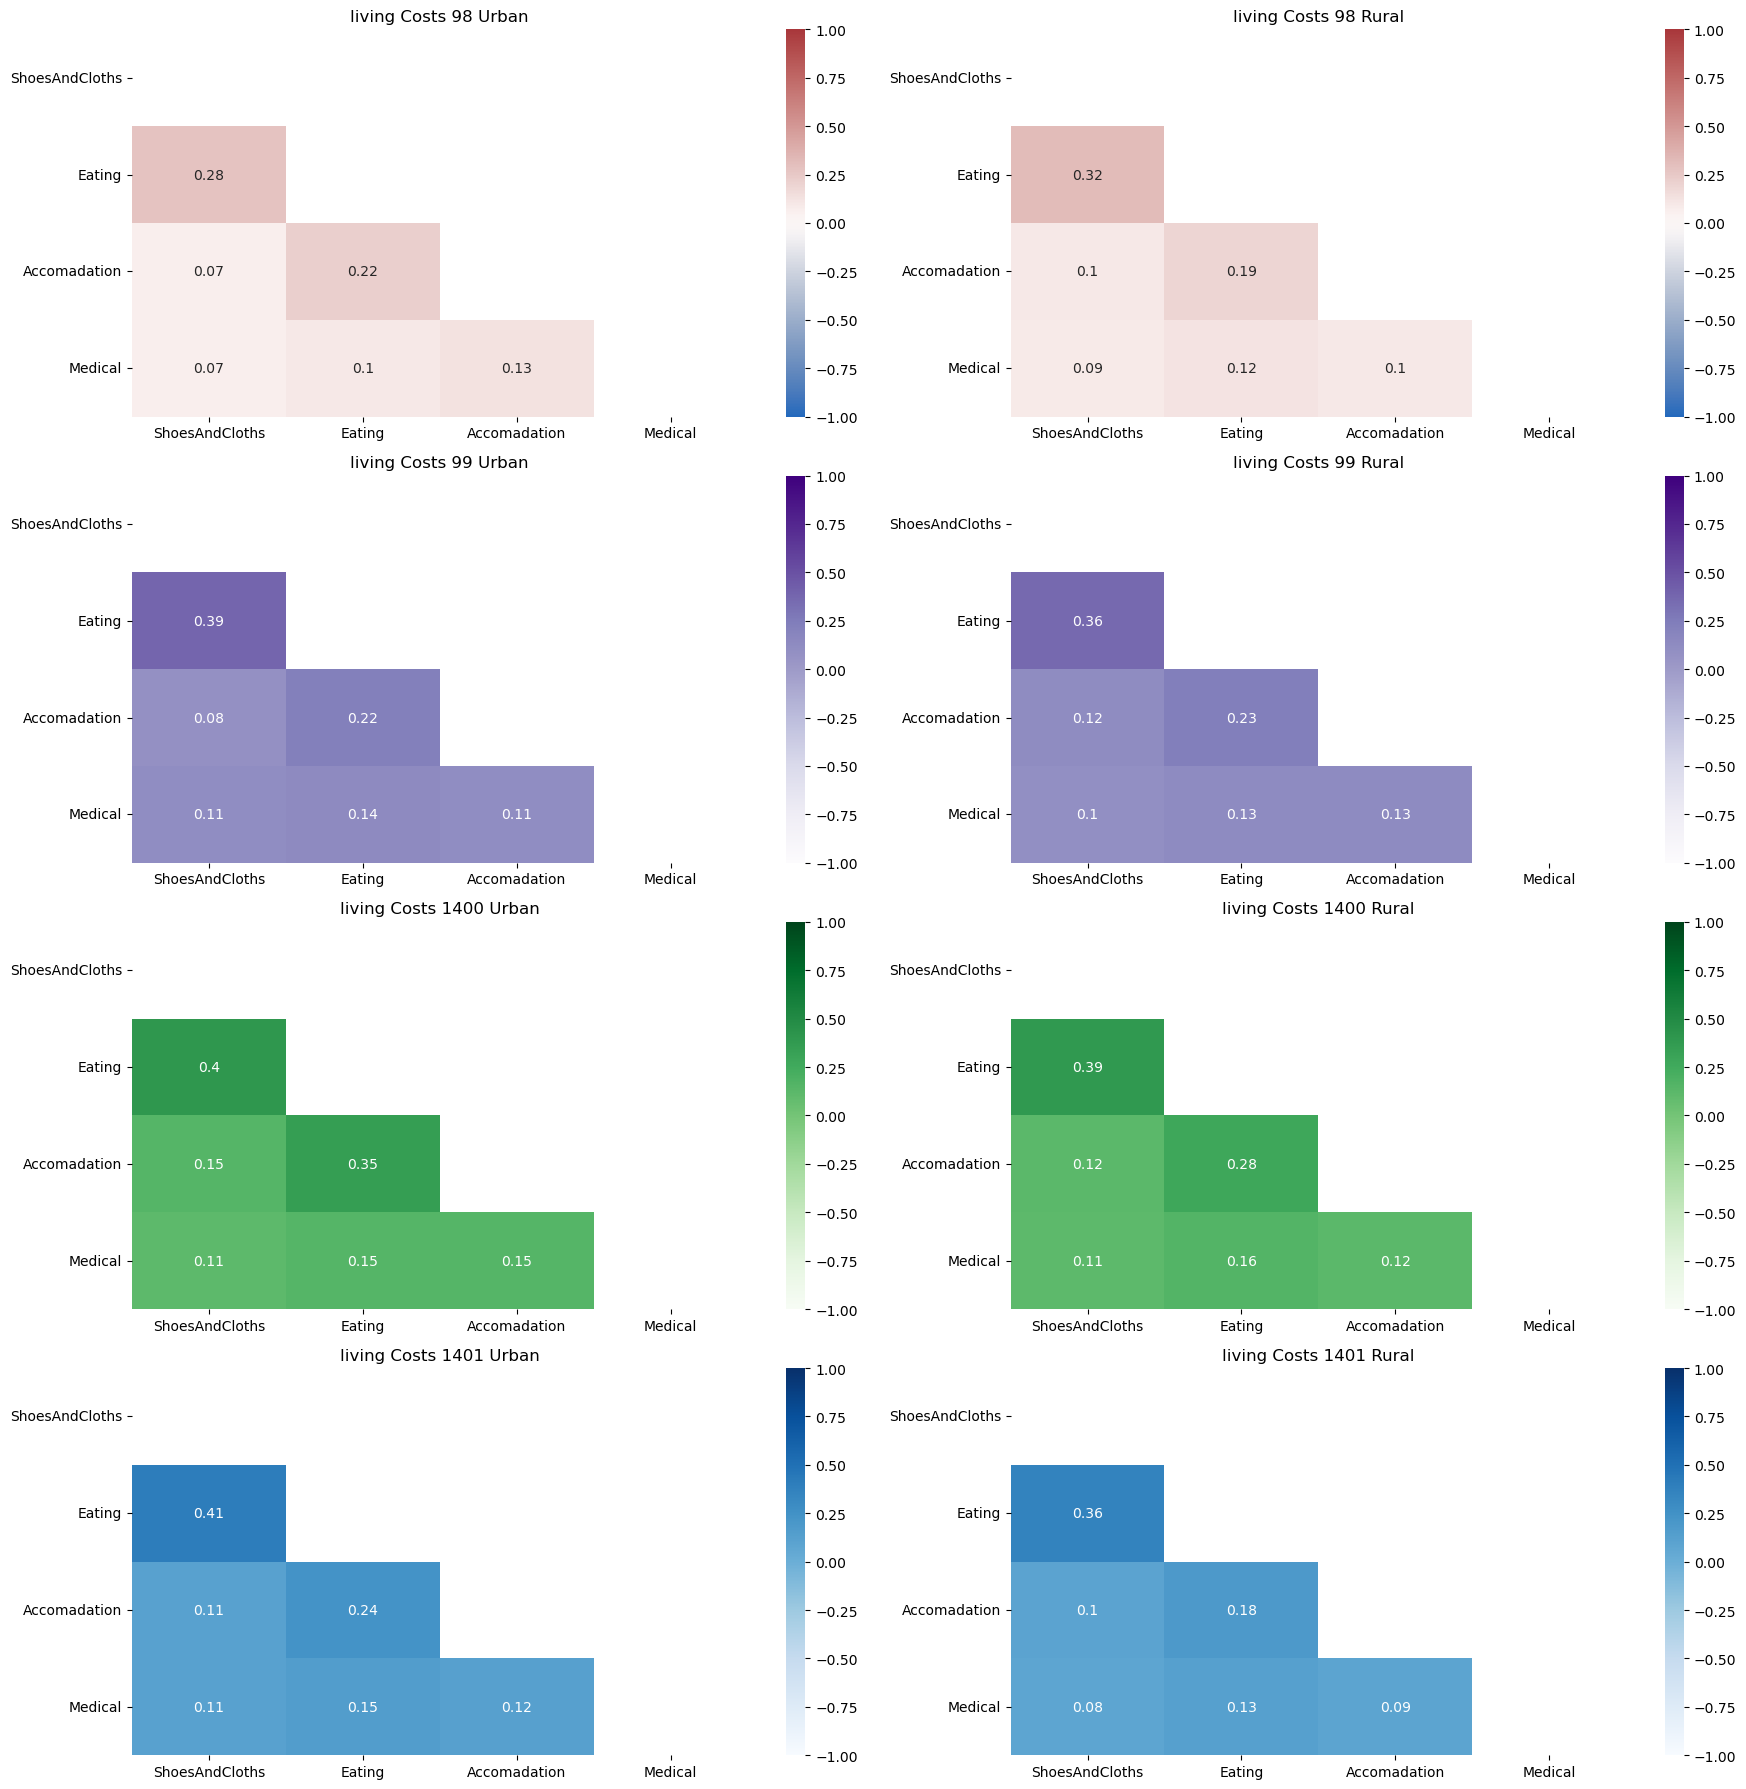

In [22]:
import numpy as np
fig,axes = plt.subplots(nrows=4, ncols=2, figsize=(18, 18))

filtered_98_U = {'ShoesAndCloths':data_98_urban['Cost_S03'],'Eating':data_98_urban['Cost_S01'],'Accomadation':data_98_urban['Cost_S04'],'Medical':data_98_urban['Cost_S06']}
df_filtered_98_U = pd.DataFrame(filtered_98_U)
corrmatrix1 = df_filtered_98_U.corr().round(2)
print(corrmatrix1)
mask1 = np.triu(np.ones_like(corrmatrix1, dtype=bool))
sns.heatmap(corrmatrix1, annot=True, vmin=-1, vmax=1, center=0, cmap='vlag',ax=axes[0, 0],mask = mask1)
axes[0,0].set_title('living Costs 98 Urban')

filtered_98_R = {'ShoesAndCloths':data_98_rural['Cost_S03'],'Eating':data_98_rural['Cost_S01'],'Accomadation':data_98_rural['Cost_S04'],'Medical':data_98_rural['Cost_S06']}
df_filtered_98_R = pd.DataFrame(filtered_98_R)
corrmatrix2 = df_filtered_98_R.corr().round(2)
mask2 = np.triu(np.ones_like(corrmatrix2, dtype=bool))
sns.heatmap(corrmatrix2, annot=True, vmin=-1, vmax=1, center=0, cmap='vlag',ax=axes[0, 1],mask=mask2)
axes[0,1].set_title('living Costs 98 Rural')

filtered_99_U = {'ShoesAndCloths':data_99_urban['Cost_S03'],'Eating':data_99_urban['Cost_S01'],'Accomadation':data_99_urban['Cost_S04'],'Medical':data_99_urban['Cost_S06']}
df_filtered_99_U = pd.DataFrame(filtered_99_U)
corrmatrix3 = df_filtered_99_U.corr().round(2)
mask3 = np.triu(np.ones_like(corrmatrix3, dtype=bool))
sns.heatmap(corrmatrix3, annot=True, vmin=-1, vmax=1, center=0, cmap='Purples',ax=axes[1, 0],mask=mask3)
axes[1,0].set_title('living Costs 99 Urban')

filtered_99_R = {'ShoesAndCloths':data_99_rural['Cost_S03'],'Eating':data_99_rural['Cost_S01'],'Accomadation':data_99_rural['Cost_S04'],'Medical':data_99_rural['Cost_S06']}
df_filtered_99_R = pd.DataFrame(filtered_99_R)
corrmatrix4 = df_filtered_99_R.corr().round(2)
mask4 = np.triu(np.ones_like(corrmatrix4, dtype=bool))
sns.heatmap(corrmatrix4, annot=True, vmin=-1, vmax=1, center=0, cmap='Purples',ax=axes[1, 1],mask=mask4)
axes[1,1].set_title('living Costs 99 Rural')

filtered_400_U = {'ShoesAndCloths':data_400_urban['Cost_S03'],'Eating':data_400_urban['Cost_S01'],'Accomadation':data_400_urban['Cost_S04'],'Medical':data_400_urban['Cost_S06']}
df_filtered_400_U = pd.DataFrame(filtered_400_U)
corrmatrix5 = df_filtered_400_U.corr().round(2)
mask5 = np.triu(np.ones_like(corrmatrix5, dtype=bool))
sns.heatmap(corrmatrix5, annot=True, vmin=-1, vmax=1, center=0, cmap='Greens',ax=axes[2, 0],mask=mask5)
axes[2,0].set_title('living Costs 1400 Urban')

filtered_400_R = {'ShoesAndCloths':data_400_rural['Cost_S03'],'Eating':data_400_rural['Cost_S01'],'Accomadation':data_400_rural['Cost_S04'],'Medical':data_400_rural['Cost_S06']}
df_filtered_400_R = pd.DataFrame(filtered_400_R)
corrmatrix6 = df_filtered_400_R.corr().round(2)
mask6 = np.triu(np.ones_like(corrmatrix6, dtype=bool))
sns.heatmap(corrmatrix6, annot=True, vmin=-1, vmax=1, center=0, cmap='Greens',ax=axes[2, 1],mask=mask6)
axes[2,1].set_title('living Costs 1400 Rural')

filtered_401_U = {'ShoesAndCloths':data_401_urban['Cost_S03'],'Eating':data_401_urban['Cost_S01'],'Accomadation':data_401_urban['Cost_S04'],'Medical':data_401_urban['Cost_S06']}
df_filtered_401_U = pd.DataFrame(filtered_401_U)
corrmatrix7 = df_filtered_401_U.corr().round(2)
mask7 = np.triu(np.ones_like(corrmatrix7, dtype=bool))
sns.heatmap(corrmatrix7, annot=True, vmin=-1, vmax=1, center=0, cmap='Blues',ax=axes[3, 0],mask=mask7)
axes[3,0].set_title('living Costs 1401 Urban')

filtered_401_R = {'ShoesAndCloths':data_401_rural['Cost_S03'],'Eating':data_401_rural['Cost_S01'],'Accomadation':data_401_rural['Cost_S04'],'Medical':data_401_rural['Cost_S06']}
df_filtered_401_R = pd.DataFrame(filtered_401_R)
corrmatrix8 = df_filtered_401_R.corr().round(2)
mask8 = np.triu(np.ones_like(corrmatrix8, dtype=bool))
sns.heatmap(corrmatrix8, annot=True, vmin=-1, vmax=1, center=0, cmap='Blues',ax=axes[3, 1],mask=mask8)
axes[3,1].set_title('living Costs 1401 Rural')

plt.tight_layout()
plt.show()

آزمون فرض
به نظر شما درآمد خانوار های شهری و روستایی در استان چهارمحال و بختیاری با هم برابر است؟


avg u:363424712.662037
avg R:260475186.74683544


/home/hamidbp/anaconda3/envs/quera/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/hamidbp/anaconda3/envs/quera/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


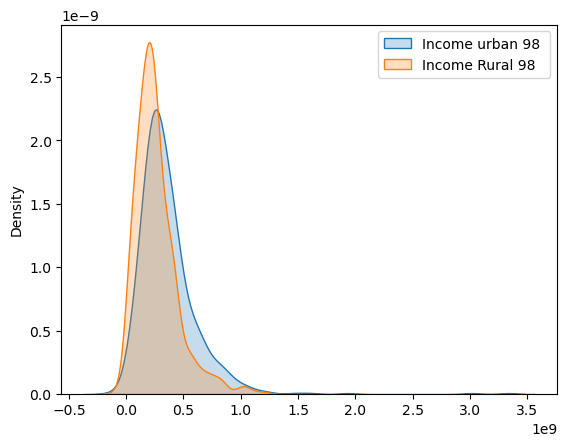

In [88]:
# netincome_w_y
# income_s_y
# income_o_y
# income_Su_y
##CharmahalBakhtiari
data_98_urban_charmahal = data_98_urban[data_98_urban.province=='CharmahalBakhtiari']
income98_urban = data_98_urban_charmahal['netincome_w_y']+data_98_urban_charmahal['income_s_y']+data_98_urban_charmahal['income_o_y']+data_98_urban_charmahal['income_Su_y']


data_98_rural_charmahal = data_98_rural[data_98_rural.province=='CharmahalBakhtiari']
income98_rural = data_98_rural_charmahal['netincome_w_y']+data_98_rural_charmahal['income_s_y']+data_98_rural_charmahal['income_o_y']+data_98_rural_charmahal['income_Su_y']

print("avg u:" + str(income98_urban.mean()))
print("avg R:"+ str(income98_rural.mean()))
sns.kdeplot(income98_urban, label='Income urban 98 ', fill=True)
sns.kdeplot(income98_rural, label='Income Rural 98', fill=True)

plt.legend()
plt.show()


In [52]:
from scipy.stats import shapiro
normal_test_stat, normal_p_value = sp.stats.shapiro(income98_urban)
normal_p_value


2.114277209279307e-31

In [53]:
normal_test_stat2, normal_p_value2 = sp.stats.shapiro(income98_rural)
normal_p_value2

3.10940011587708e-19

In [54]:
u_statistic, p_value3 = sp.stats.mannwhitneyu(income98_urban, income98_rural)
p_value3

2.651191958137599e-17

In [56]:
u_statistic2,p_value_g = sp.stats.mannwhitneyu(income98_urban, income98_rural,alternative="greater")
p_value_g


1.3255959790687994e-17

In [62]:
income98_urban_transformed, lambda_u = sp.stats.yeojohnson(income98_urban)
lambda_u

0.9537069585455173

In [63]:
income98_rural_transformed, lambda_R = sp.stats.yeojohnson(income98_rural)
lambda_R

0.960798092400237

/home/hamidbp/anaconda3/envs/quera/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/hamidbp/anaconda3/envs/quera/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


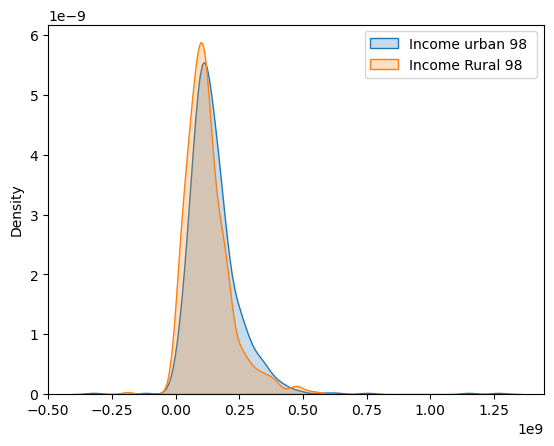

In [64]:
sns.kdeplot(income98_urban_transformed, label='Income urban 98 ', fill=True)
sns.kdeplot(income98_rural_transformed, label='Income Rural 98', fill=True)

plt.legend()
plt.show()


In [65]:
normal_test_stat3, normal_p_value_t = sp.stats.shapiro(income98_urban_transformed)
normal_p_value_t

7.43149799665976e-30

In [66]:
u_statistic3, p_value4 = sp.stats.mannwhitneyu(income98_urban_transformed, income98_rural_transformed)
p_value4

4.119523380667973e-07

In [96]:
n1 = data_98_urban_charmahal[(data_98_urban_charmahal['netincome_w_y']<0)].count()
n2 = data_98_urban_charmahal[(data_98_urban_charmahal['income_s_y']<0)].count() #6 negative data in urban
n3 = data_98_urban_charmahal[(data_98_urban_charmahal['income_o_y']<0)].count()
n4 = data_98_urban_charmahal[(data_98_urban_charmahal['income_Su_y']<0)].count()

n5 = data_98_rural_charmahal[(data_98_rural_charmahal['income_s_y']<0)].count() # and 8 negative data in rural 
n2

#income_s_y has 6 columns negative data so decided to change to ignore them





Address            6
year               6
regionType         6
Cost_S01           6
Cost_S02           6
                  ..
income_s_y         6
member_incomeO     6
income_o_y         6
member_incomeSu    6
income_Su_y        6
Length: 142, dtype: int64

#just take positive rows

avg u:365738759.82087225
avg R:263615693.81330472
min u:6010000.0
min R:15980000.0


/home/hamidbp/anaconda3/envs/quera/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/hamidbp/anaconda3/envs/quera/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


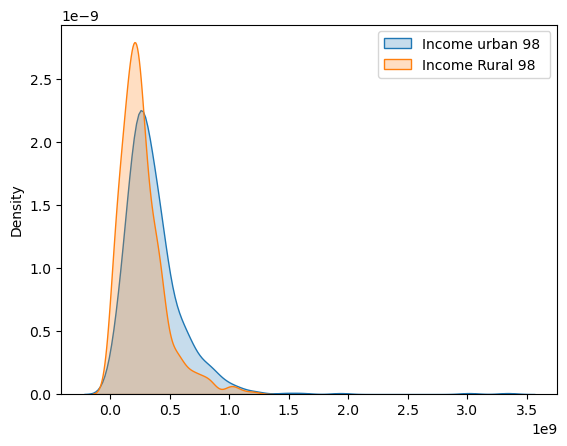

In [91]:
data_98_urban_charmahal_positive = data_98_urban_charmahal[data_98_urban_charmahal['income_s_y']>=0]
data_98_rural_charmahal_positive = data_98_rural_charmahal[data_98_rural_charmahal['income_s_y']>=0]
income98_urban_p = data_98_urban_charmahal_positive['netincome_w_y']+data_98_urban_charmahal_positive['income_s_y']+data_98_urban_charmahal_positive['income_o_y']+data_98_urban_charmahal_positive['income_Su_y']
income98_rural_p = data_98_rural_charmahal_positive['netincome_w_y']+data_98_rural_charmahal_positive['income_s_y']+data_98_rural_charmahal_positive['income_o_y']+data_98_rural_charmahal_positive['income_Su_y']
print("avg u:" + str(income98_urban_p.mean()))
print("avg R:"+ str(income98_rural_p.mean()))

print("min u:" + str(income98_urban_p.min()))
print("min R:"+ str(income98_rural_p.min()))

sns.kdeplot(income98_urban_p, label='Income urban 98 ', fill=True)
sns.kdeplot(income98_rural_p, label='Income Rural 98', fill=True)

plt.legend()
plt.show()



In [97]:
normal_test_stat4, normal_p_value_po = sp.stats.shapiro(income98_urban_p)
normal_p_value_po

1.544105610705221e-31

In [110]:
u_statistic5, p_value6 = sp.stats.mannwhitneyu(income98_urban_p, income98_rural_p)
p_value6

1.0293520422771494e-16

In [98]:
income98_urban_transformed2, lambda_boxcox_u = sp.stats.boxcox(income98_urban_p)
lambda_boxcox_u
income98_rural_transformed2, lambda_boxcox_r = sp.stats.boxcox(income98_rural_p)
lambda_boxcox_r

0.22255406583213086

/home/hamidbp/anaconda3/envs/quera/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/hamidbp/anaconda3/envs/quera/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


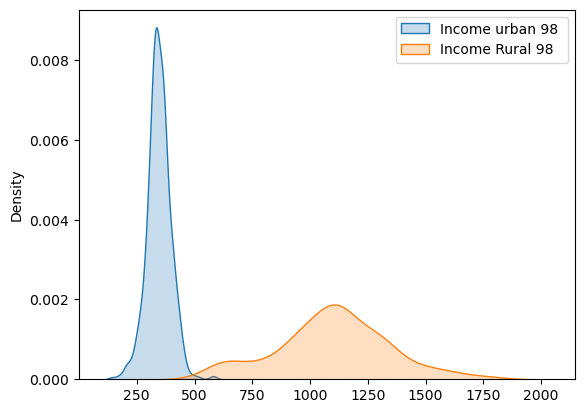

In [107]:
sns.kdeplot(income98_urban_transformed2, label='Income urban 98 ', fill=True)
sns.kdeplot(income98_rural_transformed2, label='Income Rural 98', fill=True)

plt.legend()
plt.show()


In [100]:
normal_test_stat5, normal_p_value_po_t = sp.stats.shapiro(income98_urban_transformed2)
normal_p_value_po_t

2.0069851670556167e-07

In [104]:
income98_log_transformed_urban = np.log(income98_urban_transformed2)
income98_log_transformed_rural = np.log(income98_rural_transformed2)
normal_test_stat6, normal_p_value_po_lt = sp.stats.shapiro(income98_log_transformed_urban)
normal_p_value_po_lt

5.393811781367937e-13

In [105]:
u_statistic4, p_value5 = sp.stats.mannwhitneyu(income98_log_transformed_urban, income98_log_transformed_rural)
p_value5

5.633397481632608e-178

/home/hamidbp/anaconda3/envs/quera/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/hamidbp/anaconda3/envs/quera/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


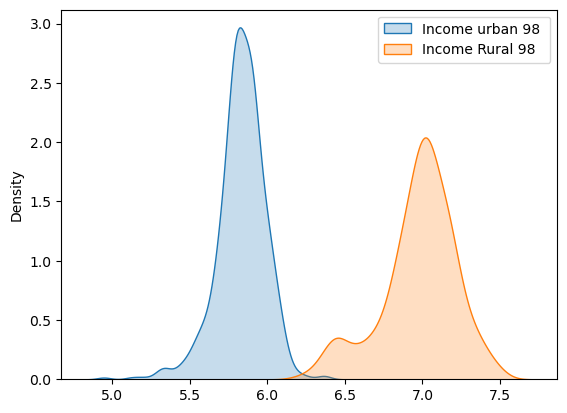

In [106]:
sns.kdeplot(income98_log_transformed_urban, label='Income urban 98 ', fill=True)
sns.kdeplot(income98_log_transformed_rural, label='Income Rural 98', fill=True)

plt.legend()
plt.show()
